In [1]:
from mmw.parse import *

In [2]:
all_essays, all_questions, all_answers = load_results('data/evaluations/run_5_ft-davinci_explanation')

In [3]:
marked_essays, filtered_marked_essays, questions = parse_annotations()

In [4]:
essay_str_list = [int(e[0][:-5][-2:]) for e in all_essays]

In [5]:
all_parsed_answers = []
for a in all_answers:
    essat_id = essay_str_list[a[0]]
    
    all_parsed_answers.append((a[0],a[1],
                               a[-1],
                               int(a[3]['choices'][0]['text'][:2].strip())))

In [6]:
differences = [abs(a[-2]-a[-1]) for a in all_parsed_answers]

In [7]:
from matplotlib import pyplot as plt

(array([106.,   0.,   0.,   0.,   0.,  79.,   0.,   0.,   0.,  10.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

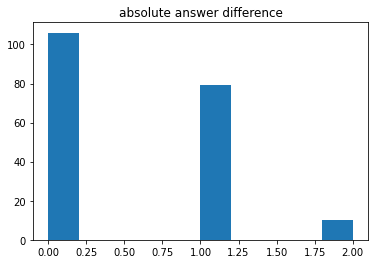

In [8]:
plt.title('absolute answer difference')
plt.hist(differences)

In [22]:
(79+106)/195

0.9487179487179487

In [10]:
accumulated_variances_essays_list = {k:[] for k in range(len(set([a[0] for a in all_parsed_answers])))}
for a in all_parsed_answers:
    accumulated_variances_essays_list[a[0]].append(abs(a[-2]-a[-1]))

In [11]:
import numpy as np

(array([15.,  0.,  0., 74.,  0.,  0., 67.,  0.,  0., 39.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

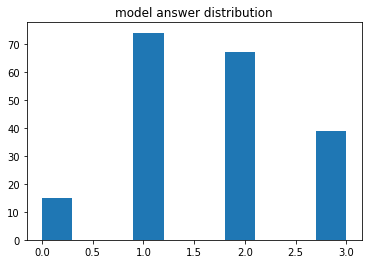

In [12]:
plt.title('model answer distribution')
plt.hist([int(a[3]['choices'][0]['text'][:2]) for a in all_answers])

In [13]:
len(all_answers)

195

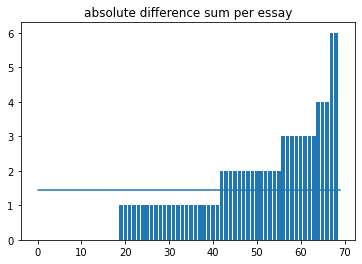

In [14]:
plt.title('absolute difference sum per essay')
plt.bar(list(range(len(accumulated_variances_essays_list))), sorted([sum(a) for a in accumulated_variances_essays_list.values()]))
plt.plot([0,len(accumulated_variances_essays_list)],[np.average([sum(a) for a in accumulated_variances_essays_list.values()])]*2)

In [15]:
sorted_sum_list = sorted(enumerate([sum(a) for a in accumulated_variances_essays_list.values()]), key = lambda x: x[1])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9871ff9b20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9872019100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9871ff9850>,
 'medians': [<matplotlib.lines.Line2D at 0x7f98720196a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9872019970>,
 'means': []}

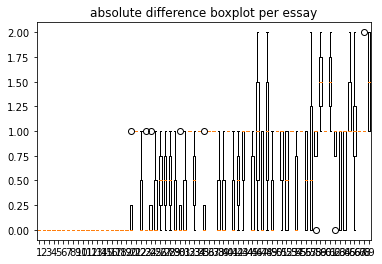

In [16]:
plt.title('absolute difference boxplot per essay')
plt.boxplot([list(accumulated_variances_essays_list.values())[s[0]] for s in sorted_sum_list])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f98719e20d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f98719e2670>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f98719d6ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f98719e2c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f98719e2ee0>],
 'means': []}

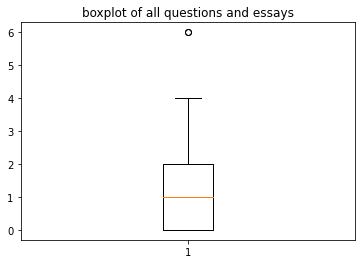

In [17]:
plt.title('boxplot of all questions and essays')
plt.boxplot([sum(s) for s in accumulated_variances_essays_list.values()])

In [18]:
current = -1 #questionid
accumulated_variances_list = {k:[] for k in range(13)}

for a in all_parsed_answers:
    accumulated_variances_list[a[1]].append(abs(a[-2]-a[-1]))

<BarContainer object of 13 artists>

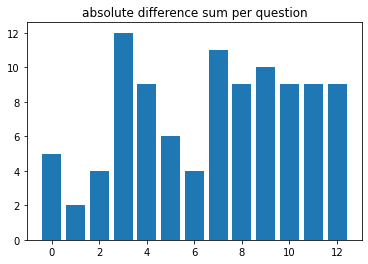

In [19]:
plt.title('absolute difference sum per question')
plt.bar(list(range(13)), [sum(accumulated_variances_list[k]) for k in accumulated_variances_list])

<BarContainer object of 13 artists>

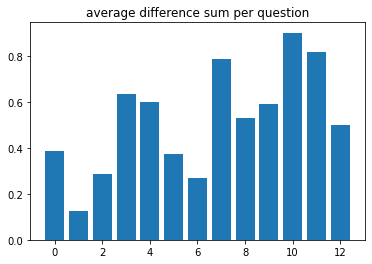

In [20]:
plt.title('average difference sum per question')
plt.bar(list(range(13)), [sum(accumulated_variances_list[k])/len(accumulated_variances_list[k]) for k in accumulated_variances_list])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f987182c910>,
 'caps': [<matplotlib.lines.Line2D at 0x7f987182ceb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f987182c760>,
 'medians': [<matplotlib.lines.Line2D at 0x7f987183d490>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f987183d760>,
 'means': []}

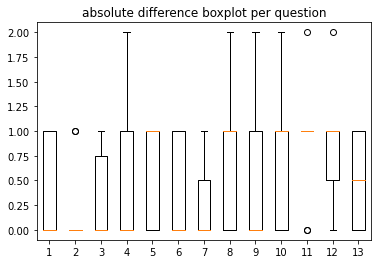

In [21]:
plt.title('absolute difference boxplot per question')
plt.boxplot([accumulated_variances_list[k] for k in accumulated_variances_list])